In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.optimize import fsolve
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

# Практическое задание по теме “Введение в аналитическую геометрию”

## 1. Задание

**Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)**

**1) Найдите их сумму. (на листочке)**

**2) Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)**

In [2]:
a, b = np.array([10, 10, 10]), np.array([0, 0, -10])
c = a + b
print(f'a = {a}\nb = {b}\na + b = c = {c}')

a = [10 10 10]
b = [  0   0 -10]
a + b = c = [10 10  0]


длину вектора находим по формуле:

$|x_1, x_2, x_3, \,\ldots,\, x_n| = \sqrt{x_1^2 + x_2^2 + x_3^2 + \,\ldots,\, + x_n^2}$

In [3]:
# найти можем как вручную:
print(np.sqrt(c[0]**2 + c[1]**2 + c[2]**2))

# так и при помощи функции Numpy linalg.norm()
print(np.linalg.norm(c))

14.142135623730951
14.142135623730951


In [4]:
# проверка: 
np.sqrt(c[0]**2 + c[1]**2 + c[2]**2) == np.linalg.norm(c)

True

## 2. Задание

**Почему прямые не кажутся перпендикулярными?**

(-5.0, 5.0)

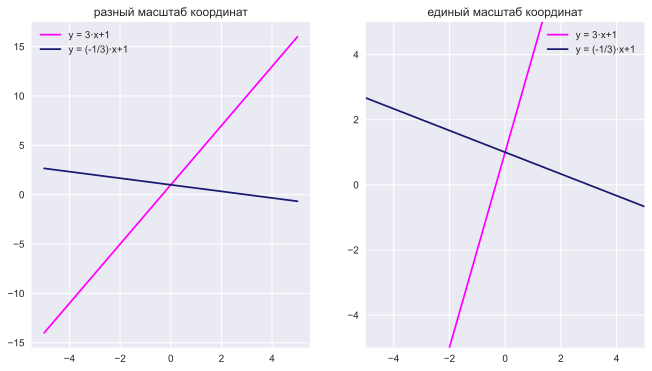

In [5]:
# из-за разного масштаба осей координат

x = np.linspace(-5, 5, 21)
y = 3*x+1
y2 = (-1/3)*x+1

fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()

ax1.plot(x,y, label='y = 3$\cdot$x+1', c='#FF00FF')
ax1.plot(x,y2, label='y = (-1/3)$\cdot$x+1', c='#191970')
ax1.legend()
ax1.set_title('разный масштаб координат')

ax2.plot(x,y, label='y = 3$\cdot$x+1', c='#FF00FF')
ax2.plot(x,y2, label='y = (-1/3)$\cdot$x+1', c='#191970')
ax2.legend()
ax2.set_title('единый масштаб координат')
fig.set_size_inches(11, 6)
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])


## 3. Задание

**Напишите код на Python, реализующий построение графиков:**

**1) окружности**

**2) эллипса**

**3) гиперболы**

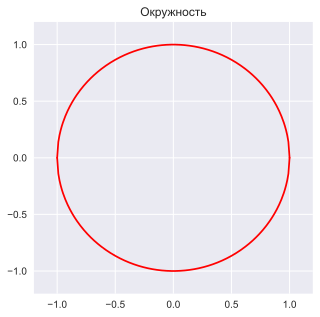

In [6]:
plt.figure(figsize=(5, 5))

x, y1, y2, r = [], [], [], 1
for i in range(-100, 101):
    x_ = i/100
    x.append(x_)
    y1.append(np.sqrt(r**2-x_**2))
    y2.append(-np.sqrt(r**2-x_**2))
    
plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='red')
plt.title('Окружность');

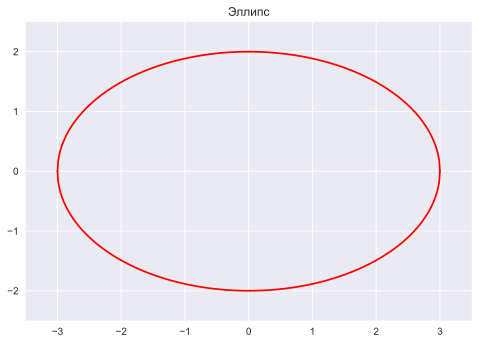

In [7]:
# эллипс
x, y1, y2, a, b = [], [], [], 3, 2
for i in range(-300, 301):
    x_ = i/100
    x.append(x_)
    y1.append(np.sqrt(1-x_**2/a**2)*b)
    y2.append(-np.sqrt(1-x_**2/a**2)*b)
    
plt.axis([-3.5, 3.5, -2.5, 2.5])
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='red')
plt.title('Эллипс');

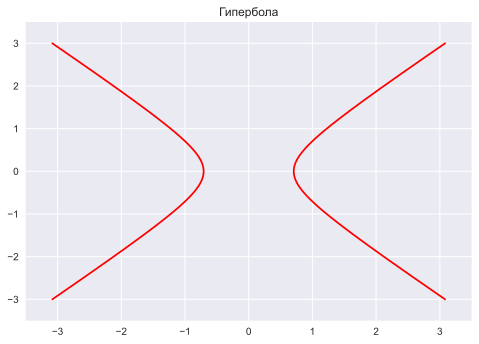

In [8]:
# гиперболы
y, x1, x2, a, b = [], [], [], 1, 1
for i in range(-300, 301):
    x_ = i/100
    y.append(x_)
    x1.append(np.sqrt((0.5+x_**2/a**2)/b**2))
    x2.append(-np.sqrt((0.5+x_**2/a**2)/b**2))
    
plt.axis([-3.5, 3.5, -3.5, 3.5])
plt.plot(x1, y, color='red')
plt.plot(x2, y, color='red')
plt.title('Гипербола');

## 4. Задание

**1) Пусть задана плоскость:**

$A\cdot x + B\cdot y + C\cdot z + D = 0$

**Напишите уравнение плоскости, параллельной данной и проходящей через начало координат.**

In [9]:
print('Ax + By + Cz = 0')

Ax + By + Cz = 0


**2) Пусть задана плоскость:**

$A_1\cdot x + B_1\cdot y + C_1\cdot z + D_1 = 0$

**и прямая:**

$\frac{x - x_1}{x_2 - x_1} = \frac{y - y_1}{y_2 - y_1} = = \frac{z - z_1}{z_2 - z_1}$

**Как узнать, принадлежит прямая плоскости или нет?**

In [10]:
print(f'если 2 точки прямой принадлежат плоскости A1x+B1y+C1z+D=0:\nA1x1 + B1y1 + C1z1 + D1 = 0\nA1x2 + B1y2 + C1z2 + D1 - 0')

если 2 точки прямой принадлежат плоскости A1x+B1y+C1z+D=0:
A1x1 + B1y1 + C1z1 + D1 = 0
A1x2 + B1y2 + C1z2 + D1 - 0


## 5. Задание

**1) Нарисуйте трехмерный график двух параллельных плоскостей.**

**2) Нарисуйте трехмерный график двух любых поверхностей второго порядка.**

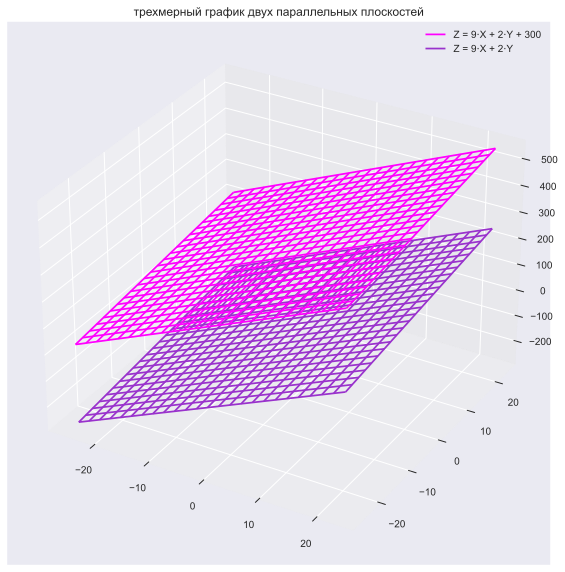

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(-25, 25, 2), np.arange(-25, 25, 2))
Z = 9*X + 2*Y + 300
Z_2 = 9*X + 2*Y 

ax.plot_wireframe(X, Y, Z, color='#FF00FF', label='Z = 9$\cdot$X + 2$\cdot$Y + 300')
ax.plot_wireframe(X, Y, Z_2, color='#9932CC', label='Z = 9$\cdot$X + 2$\cdot$Y')
plt.legend()

plt.title('трехмерный график двух параллельных плоскостей');

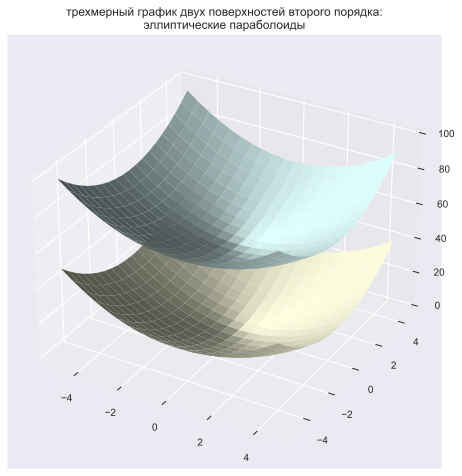

In [12]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, color='#FFFFE0', label = 'Z = X^2 + Y**2')
ax.plot_surface(X, Y, Z + 50, color='#E0FFFF')

plt.title('трехмерный график двух поверхностей второго порядка:\nэллиптические параболоиды');

# Практическое задание по теме “Графики на плоскости”

## 0. Задание

**шпаргалка**

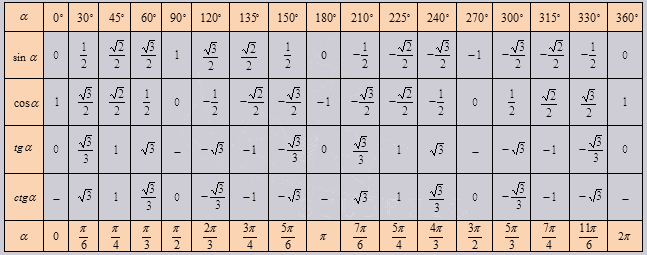

In [13]:
Image('./tablica1.png')

## 1. Задание

**Нарисуйте график функции:   для некоторых (2-3 различных) значений параметров k, a, b**

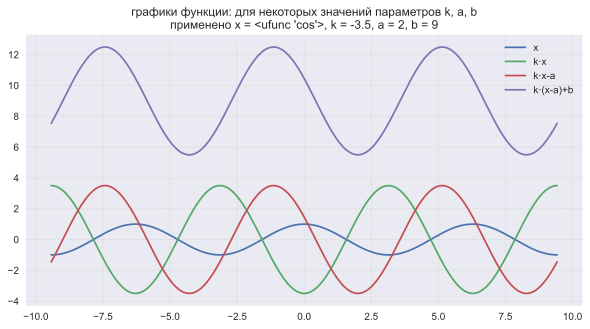

In [14]:
def function_graph(k, a, b, ratio=False):
    """можно играться и подставлять на выбор: синус, косинус, тангенс и т.п."""
    if ratio:
        ratio = ratio
    else:
        ratio = np.sin
    x = np.linspace(-3*np.pi, 3*np.pi, 1001)
    plt.figure(figsize = (10, 5))
    plt.plot(x, ratio(x), label='x')
    plt.plot(x, k * ratio(x), label='k$\cdot$x')
    plt.plot(x, k * ratio(x-a), label='k$\cdot$x-a')
    plt.plot(x, k * ratio(x-a)+b, label='k$\cdot$(x-a)+b')
    plt.title(f'графики функции: для некоторых значений параметров k, a, b\nприменено x = {ratio}, k = {k}, a = {a}, b = {b}')
    plt.grid(linestyle=':', color='#D3D3D3')
    plt.legend()

k = -3.5
a = 2
b = 9
function_graph(k, a, b, ratio=np.cos)

## 2. Задание

**Докажите, что при ортогональном преобразовании сохраняется расстояние между точками**

Определим расстояние между точками, как длину вектора вида **|xy|** с координатами $(x_1, y_1),(x_2, y_2)$ 

Преобразование в общем виде: 

$X = a_{11} \cdot x + a_{12} \cdot y + a_{13}$

$Y = a_{21} \cdot x + a_{22} \cdot y + a_{23}$


$(X_2 - X_1) = a_{11} \cdot x_2 + a_{12} \cdot y_2 + a_{13} - a_{11} \cdot x_1 + a_{12} \cdot y_1 + a_{13} = a_{11}(x_2 - x_1) + a_{12}(y_2 - y_1)$

для Y аналогично

Тогда длина преобразованного вектора **|XY|** (берём квадрат длины):

$|XY|^2 = (X_2 - X_1)^2 + (Y_2 - Y_1)^2 = (a_{11}(x_2 - x_1) + a_{12}(y_2 - y_1))^2 + (a_{21}(x_2 - x_1) + a_{22}(y_2 - y_1))^2$

После раскрытия скобок и объединения множителей получаем:

$|XY|^2 = (a_{11}^2 + a_{21}^2)(x_2 - x_1)^2 + (a_{12}^2 + a_{22}^2)(y_2 - y_1)^2 + 2(a_{11}a_{12} + a_{21}a_{22})(x_2 - x_1)(y_2 - y_1)$

Учитывая свойства ортогонального преобразования: 

$a_{11}^2 + a_{21}^2 = 1$

$a_{12}^2 + a_{22}^2 = 1$

$a_{11} \cdot a_{12} + a_{21} \cdot a_{22} = 0$

получаем:

$|XY|^2 = (x_2 - x_1)^2 + (y_2 - y_1)^2 = |xy|^2$

$\Rightarrow |XY| = |xy|$

чтд

## 3. Задание

**1) Напишите код, который будет переводить полярные координаты в декартовы.**

In [15]:
# короткий вариант через lambda

coordinate_translation = lambda x, y: f'Декартовы: (X = {round(x*np.cos(y), 3)}, Y = {round(x*np.sin(y), 3)})'
coordinate_translation(5, 90)

'Декартовы: (X = -2.24, Y = 4.47)'

In [16]:
# или вот так с проверкой

def coordinate_translation(x, y):
    assert x >= 0 and 0 <= y <= 360, 'Параметры не соответствуют области определения'
    return f'Декартовы: (X = {round(x*np.cos(y), 3)}, Y = {round(x*np.sin(y), 3)})'

coordinate_translation(5, 90)

'Декартовы: (X = -2.24, Y = 4.47)'

**2) Напишите код, который будет рисовать график окружности в полярных координатах.**

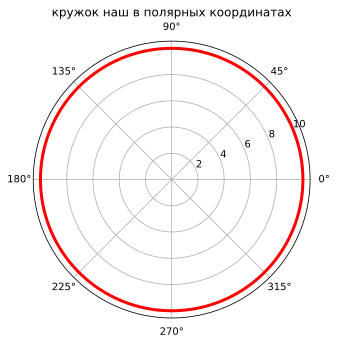

In [17]:
plt.style.use('default')
plt.figure(figsize=(5, 5))
plt.polar(np.arange(0, 2, 1/180)*np.pi, [10]*len(np.arange(0, 2, 1/180)*np.pi), c='red', lw='3')
plt.title('кружок наш в полярных координатах');

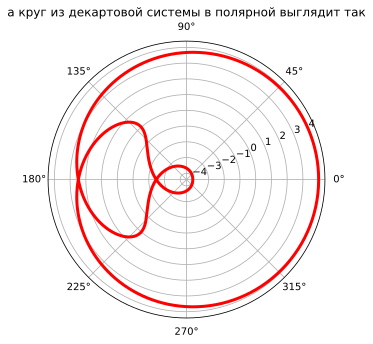

In [18]:
plt.figure(figsize=(5, 5))
def pie_chart(R, plot=False):
    x = [R*np.cos(i) for i in np.linspace(0, 2*np.pi, 1000)]
    y = [R*np.sin(i) for i in np.linspace(0, 2*np.pi, 1000)]
    plt.plot(x, y, c='red', lw='3') if plot else plt.polar(x, y, c='red', lw='3')
    plt.title('а круг из декартовой системы в полярной выглядит так')

pie_chart(4)

**3) Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.**

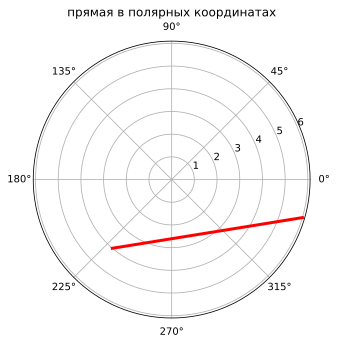

In [19]:
plt.figure(figsize=(5, 5))
plt.polar(np.arange(4, 8, 2), np.arange(4, 8, 2), c='red', lw='3')
plt.title('прямая в полярных координатах');

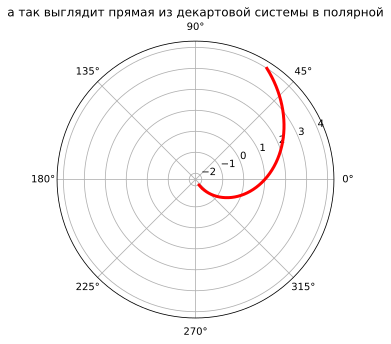

In [20]:
plt.figure(figsize=(5, 5))
def straight_chart(R, a, plot=False):
    x = r*np.cos(np.linspace(0, a, 1000))
    y = 3*x + 1
    plt.plot(x, y, c='red', lw='3') if plot else plt.polar(x, y, c='red', lw='3')
    plt.title('а так выглядит прямая из декартовой системы в полярной')

straight_chart(4, 3.5)

## 4. Задание 

**1) Решите систему уравнений:**

$
\begin{cases}
exp(x) + x \cdot (1 - y) = 1\\ 
y = x^2 - 1\\
\end{cases}
$



<!-- y = x2 – 1 exp(x) + x(1 – y) = 1

y = x2 – 1 y = (exp(x) + x – 1) / x -->

выражаем y в первом уравнении:

$
\begin{cases}
y = \frac{exp(x) - 1}{x + 1}\\ 
y = x^2 - 1\\
\end{cases}
$

первая точка: (-1.582, 1.502)
вторая точка: (2.618, 5.855)
третья точка: (4.2, 16.641)


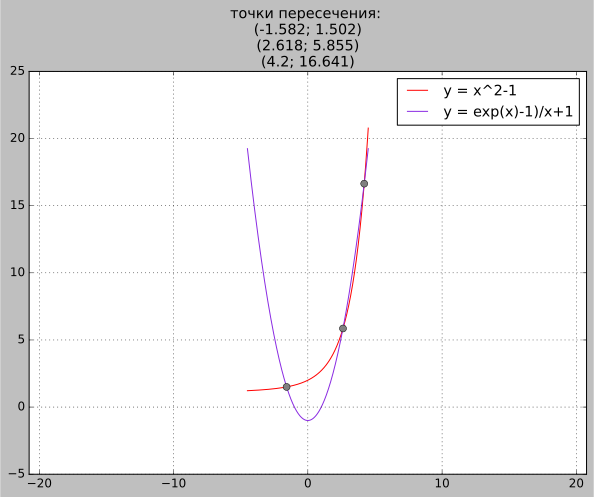

In [21]:
plt.style.use('classic')
plt.figure(figsize=(10, 7))
x = np.linspace(-4.5, 4.5, 2001)
ind = np.where(x==0)
x = np.delete(x, ind)

y1 = (np.exp(x)-1)/x+1
y2 = x**2 - 1

plt.plot(x, y1, label='y = x^2-1', c='r')
plt.plot(x, y2, label='y = exp(x)-1)/x+1', c='#8A2BE2')
plt.axis('equal')
plt.grid()
plt.legend()

def equations(point):
    x, y = point
    return (y - x**2 +1, np.exp(x) + x * (1-y) - 1)

x1, y1 = fsolve(equations, (-2, 5))
print(f'первая точка: {round(x1, 3), round(y1, 3)}')
x2, y2 = fsolve(equations, (3, 6))
print(f'вторая точка: {round(x2, 3), round(y2, 3)}')
x3, y3 = fsolve(equations, (5, 20))
print(f'третья точка: {round(x3, 3), round(y3, 3)}')

plt.title(f'точки пересечения: \n({round(x1, 3)}; {round(y1, 3)})\n({round(x2, 3)}; {round(y2, 3)})\n({round(x3, 3)}; {round(y3, 3)})')
plt.plot(-1.582, 1.502, 'o', c='#808080', markersize = 7)
plt.plot(2.618, 5.855, 'o', c='#808080', markersize = 7)
plt.plot(4.2, 16.641, 'o', c='#808080', markersize = 7);

т.к. у нас есть в знаменателе x, то нужно проверить, не будет ли система при x=0 иметь решение

$x :=0 $

тогда $y = -1$

**=> четвёртый корень: (0; -1)**

**2) Решите систему уравнений и неравенств:**

$
\begin{cases}
y = x^2 - 1\\
exp(x) + x \cdot (1 - y) - 1 > 0\\ 
\end{cases}
$

подставим y из первого уравнения во второе, получим:

$exp(x) + x(2 - x^2) - 1 > 0$ 

x1 = [-1.582]
x2 = [2.618]
x3 = [4.2]
x4 = [0.]


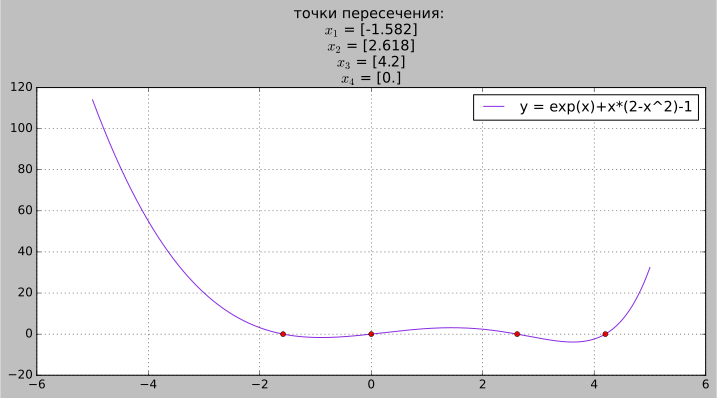

In [22]:
x = np.linspace(-5, 5, 2001)
plt.figure(figsize=(12, 5))
plt.plot(x, np.exp(x)+x*(2-x**2)-1, c='#8A2BE2', label='y = exp(x)+x*(2-x^2)-1')
plt.grid()
plt.legend()

equations = lambda x: np.exp(x)+x*(2-x**2)-1

x1 = fsolve(equations, -2)
x2 = fsolve(equations, 3)
x3 = fsolve(equations, 5)
x4 = fsolve(equations, 1)
print(f'x1 = {np.round(x1, 3)}\nx2 = {np.round(x2, 3)}\nx3 = {np.round(x3, 3)}\nx4 = {np.round(x4, 3)}')

plt.title(f'точки пересечения: \n$x_1$ = {np.round(x1, 3)}\n$x_2$ = {np.round(x2, 3)}\n$x_3$ = {np.round(x3, 3)}\n$x_4$ = {np.round(x4)}')

plt.plot(-1.582, 0, 'o', c='r', markersize = 5)
plt.plot(2.618, 0, 'o', c='r', markersize = 5)
plt.plot(4.2, 0, 'o', c='r', markersize = 5)
plt.plot(0, 0, 'o', c='r', markersize = 5);

решением системы будут те интервалы графика, что выше оси y, они отмечены на графике точками, найденными с помощью функции fsolve()

$(-\infty;\,-1,582)$

$(0;\, 2,618)$

$(4,2;\,+\infty)$